1: 14760
2: 4136
3: 921
4: 161
5: 31
6: 3
7: 2
8: 1
Height: 4, Aspect: 1.33


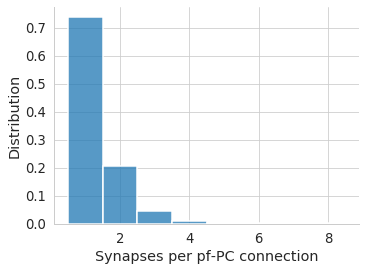

In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import random
import compress_pickle

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'multi_syn_ratio_210708_random'


sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

from weight_database import WeightDatabase
weightdb = WeightDatabase()

gzdb = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/' \
       'gen_210429_setup01_syndb_threshold_10_coalesced.gz'
#        'gen_201224_setup01_syndb_threshold_10_coalesced'

def weight_fn(syn):
    return 1

weightdb.load_syn_db(gzdb, weight_fn=weight_fn)
mpd = MyPlotData()
mpd_raw = MyPlotData()
hist = defaultdict(int)
weights_db = weightdb.get_weights()

for neuron, pc_weights in weights_db.items():
    # print(n)
    for pc, weights in pc_weights.items():
        mpd_raw.add_data_point(
            num_syns=len(weights),
            group='Data')
        hist[len(weights)] += 1

# print(hist)
for k in sorted([k for k in hist.keys()]):
    print(f'{k}: {hist[k]}')
    mpd.add_data_point(
        count=hist[k],
        num_syns=k,
        group='Data',
    )
mpd.add_pdf(key='count')
    
importlib.reload(my_plot); my_plot.my_displot(
    mpd_raw,
    x="num_syns",
    kind='hist',
    stat='probability',
    discrete=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_hist.svg',
    )


In [2]:

syn_pf_dist_db = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/' \
                                      'pfs_mesh_locs/syn_pf_distance_db_210707.gz')
pf_pc_db = compress_pickle.load(gzdb)


In [152]:
# load syn to pf dist database
max_dist = 1500
min_pfs = 6

if False:
    import compress_pickle
    syn_pf_dist_db = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/' \
                                          'pfs_mesh_locs/syn_pf_distance_db_210707.gz')
    pf_pc_db = compress_pickle.load(gzdb)
success_count = 0
fail_count = 0
ignored_syn_locs = []

pc_pf_count = defaultdict(lambda: defaultdict(int))
for pf in pf_pc_db:
    for pc in pf_pc_db[pf]:
        for syn in pf_pc_db[pf][pc]:
#             print(syn)
            syn_loc = syn['syn_loc']
            if syn_loc not in syn_pf_dist_db:
                fail_count += 1
                ignored_syn_locs.append(syn_loc)
                continue
            pfs = syn_pf_dist_db[syn_loc]
            within_dist = [pf for pf, attr in pfs.items() if attr[0] <= max_dist]
            if len(within_dist) == 0:
                ignored_syn_locs.append(syn_loc)
                continue
#                 print(syn_loc)
#                 print(pfs)
#                 print(success_count)
            if len(within_dist) < min_pfs:
                ignored_syn_locs.append(syn_loc)
                continue
            random_pf = random.choice(within_dist)
            pc_pf_count[pc][random_pf] += 1
            success_count += 1
#             asdf

random_hist = defaultdict(int)
mpd_raw_random = MyPlotData()
for pc in pc_pf_count:
    for pf in pc_pf_count[pc]:
        n_syns = pc_pf_count[pc][pf]
        random_hist[n_syns] += 1
        mpd_raw_random.add_data_point(
            num_syns=n_syns,
            group='Random')

mpd_random = MyPlotData()
for k in sorted([k for k in random_hist.keys()]):
    print(f'{k}: {random_hist[k]}')
    mpd_random.add_data_point(
        num_syns=k,
        count=random_hist[k],
        group='Random',
    )
mpd_random.add_pdf(key='count')

fout = f'{script_n}_ignored_syn_locs_{max_dist}_{min_pfs}.gz'
if not os.path.isfile(fout):
    compress_pickle.dump(ignored_syn_locs, fout)
    print(fout)

1: 11009
2: 2770
3: 641
4: 92
5: 26
6: 6
multi_syn_ratio_210708_random_ignored_syn_locs_1500_6.gz


In [153]:
n_random = 80
max_dist = 1500
min_pfs = 6
raw_count = defaultdict(list)
for n in range(n_random):
    success_count = 0
    fail_count = 0
    ignored_syn_locs = []

    pc_pf_count = defaultdict(lambda: defaultdict(int))
    for pf in pf_pc_db:
        for pc in pf_pc_db[pf]:
            for syn in pf_pc_db[pf][pc]:
    #             print(syn)
                syn_loc = syn['syn_loc']
                if syn_loc not in syn_pf_dist_db:
                    fail_count += 1
                    ignored_syn_locs.append(syn_loc)
                    continue
                pfs = syn_pf_dist_db[syn_loc]
                within_dist = [pf for pf, attr in pfs.items() if attr[0] <= max_dist]
                if len(within_dist) == 0:
                    ignored_syn_locs.append(syn_loc)
                    continue
    #                 print(syn_loc)
    #                 print(pfs)
    #                 print(success_count)
                if len(within_dist) < min_pfs:
                    ignored_syn_locs.append(syn_loc)
                    continue
                random_pf = random.choice(within_dist)
                pc_pf_count[pc][random_pf] += 1
                success_count += 1
    #             asdf

    random_hist = defaultdict(int)
    for pc in pc_pf_count:
        for pf in pc_pf_count[pc]:
            n_syns = pc_pf_count[pc][pf]
            random_hist[n_syns] += 1
    
    for i in range(10):
        raw_count[i].append(random_hist[i])
    print(n, end='..')


0..1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..26..27..28..29..30..31..32..33..34..35..36..37..38..39..40..41..42..43..44..45..46..47..48..49..50..51..52..53..54..55..56..57..58..59..60..61..62..63..64..65..66..67..68..69..70..71..72..73..74..75..76..77..78..79..

In [154]:
fout = f'{script_n}_hist_{max_dist}_{min_pfs}.gz'
compress_pickle.dump(raw_count, fout)
print(fout)

multi_syn_ratio_210708_random_hist_1500_6.gz


Height: 4, Aspect: 1.33


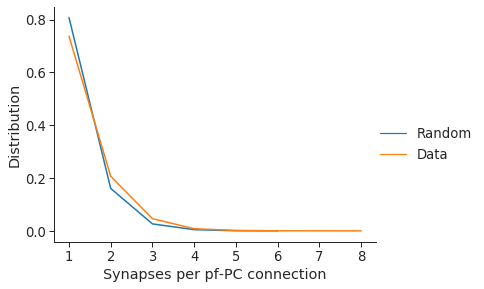

In [5]:
mpd_all = MyPlotData()
mpd_all.append(mpd_random)
mpd_all.append(mpd)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x="num_syns",
    y="count_pdf",
    hue="group",
    kind='line',
#     stat='probability',
#     discrete=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_random_{max_dist}_{min_pfs}.svg',
    )



raw_count[1]

In [ ]:
mpd_all = MyPlotData()
mpd_all.append(mpd_raw_random)
mpd_all.append(mpd_raw)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x="num_syns",
    hue="group",
    kind='line',
    stat='probability',
    discrete=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_hist.svg',
    )

